In [35]:
# GENERAL LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [36]:
# DATA IMPORT
netflix = pd.read_csv('../data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,Comedy,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,category
0,0.0,1.0,0.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,niche
1,0.0,1.0,0.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,other
2,0.0,0.0,1.0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,other
3,0.0,1.0,0.0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,other
4,1.0,0.0,0.0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,niche


In [37]:
# SKLEARN IMPORTS
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [38]:
# SYNTHESIS FUNCTION
def synthetise(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    model_name = type(model).__name__
    print(re.sub(r"(\w)([A-Z])", r"\1 \2", model_name).upper())
    print('====================')
    print('TRAIN dataset')
    print(f'Accuracy score: {accuracy_score(y_train, y_train_pred):.1%}')
    print(f'Recall score (macro): {recall_score(y_train, y_train_pred, average="macro"):.1%}')
    print(f'Precision score (macro): {precision_score(y_train, y_train_pred, average="macro"):.1%}')
    print(f'ROC_AUC score (macro): {roc_auc_score(y_train, y_train_score, average="macro", multi_class="ovo"):.1%}')
    print(f'Confusion matrix')
    print(confusion_matrix(y_train, y_train_pred))
    print('====================')
    print('TEST dataset')
    print(f'Accuracy score: {accuracy_score(y_test, y_test_pred):.1%}')
    print(f'Recall score (macro): {recall_score(y_test, y_test_pred, average="macro"):.1%}')
    print(f'Precision score (macro): {precision_score(y_test, y_test_pred, average="macro"):.1%}')
    print(f'ROC_AUC score (macro): {roc_auc_score(y_test, y_test_score, average="macro", multi_class="ovo"):.1%}')
    print(f'Confusion matrix')
    print(confusion_matrix(y_test, y_test_pred))

In [39]:
# DATA PREPARATION

X = netflix.drop('category', axis = 1)
y = netflix.category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
QuadraticDiscriminantAnalysis?

Init signature:
QuadraticDiscriminantAnalysis(
    *,
    priors=None,
    reg_param=0.0,
    store_covariance=False,
    tol=0.0001,
)
Docstring:     
Quadratic Discriminant Analysis.

A classifier with a quadratic decision boundary, generated
by fitting class conditional densities to the data
and using Bayes' rule.

The model fits a Gaussian density to each class.

.. versionadded:: 0.17
   *QuadraticDiscriminantAnalysis*

Read more in the :ref:`User Guide <lda_qda>`.

Parameters
----------
priors : ndarray of shape (n_classes,), default=None
    Class priors. By default, the class proportions are inferred from the
    training data.

reg_param : float, default=0.0
    Regularizes the per-class covariance estimates by transforming S2 as
    ``S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features)``,
    where S2 corresponds to the `scaling_` attribute of a given class.

store_covariance : bool, default=False
    If True, the class covariance matrices are explicitly computed and
 

In [41]:
# QUADRATIC DISCRIMINANT ANALYSIS

## Naive view: default hyperparameters & all features
### Model fitting
qdc = QuadraticDiscriminantAnalysis()
qdc.fit(X_train, y_train)

/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [42]:
### Synthesis
synthetise(qdc, X_train, X_test, y_train, y_test)

QUADRATIC DISCRIMINANT ANALYSIS
TRAIN dataset
Accuracy score: 35.7%
Recall score (macro): 55.6%
Precision score (macro): 50.4%
ROC_AUC score (macro): 72.2%
Confusion matrix
[[ 608   12   75]
 [ 340  649   80]
 [2390  603  685]]
TEST dataset
Accuracy score: 32.5%
Recall score (macro): 53.1%
Precision score (macro): 48.0%
ROC_AUC score (macro): 70.9%
Confusion matrix
[[124   4  27]
 [ 76 140  13]
 [650 149 178]]


In [43]:
### Conclusions
#### Low accuracy, sensitivy / recall and precision are medium.
#### No overfit.
#### Collinearity issues: too many features? Let's try PCA.

In [44]:
## Feature selection: PCA

from sklearn.decomposition import PCA
features = X

pca = PCA(n_components=2)
components = pca.fit_transform(X)

pca_data = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])
pca_data

,pc1,pc2
0,-1.130473,-0.238811
1,1.069217,0.131089
2,-0.231434,0.345580
3,-0.613696,-0.768384
4,-1.154667,-0.378344
...,...,...
6798,-0.200304,-0.866763
6799,1.128694,-0.107932
6800,-1.174579,0.583711
6801,0.015622,0.486871


In [45]:
### Create dataframe with principal components and target variable
netflix_pca = pd.concat([pca_data, netflix[['category']]], axis = 1)
netflix_pca

,pc1,pc2,category
0,-1.130473,-0.238811,niche
1,1.069217,0.131089,other
2,-0.231434,0.345580,other
3,-0.613696,-0.768384,other
4,-1.154667,-0.378344,niche
...,...,...,...
6798,-0.200304,-0.866763,blockbuster
6799,1.128694,-0.107932,other
6800,-1.174579,0.583711,other
6801,0.015622,0.486871,other


In [46]:
### Data preparation
X_pca = netflix_pca.drop('category', axis = 1)
y_pca = netflix_pca.category

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

### Model init and fit
qdc_pca = QuadraticDiscriminantAnalysis()
qdc_pca.fit(X_train_pca, y_train_pca)

# Synthesis
synthetise(qdc_pca, X_train_pca, X_test_pca, y_train_pca, y_test_pca)

QUADRATIC DISCRIMINANT ANALYSIS
TRAIN dataset
Accuracy score: 67.7%
Recall score (macro): 38.2%
Precision score (macro): 40.0%
ROC_AUC score (macro): 70.0%
Confusion matrix
[[   0    1  694]
 [   0  219  850]
 [   0  211 3467]]
TEST dataset
Accuracy score: 70.6%
Recall score (macro): 37.9%
Precision score (macro): 38.4%
ROC_AUC score (macro): 68.9%
Confusion matrix
[[  0   1 154]
 [  0  46 183]
 [  0  62 915]]


/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ericmartinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


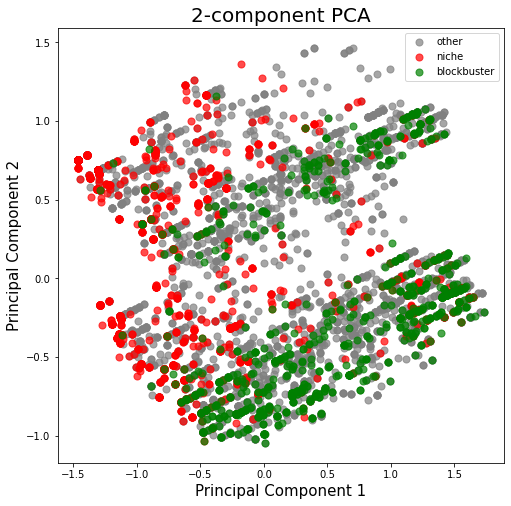

In [47]:
### Better accuracy and no overfit. Sensitivity / recall and precision are quite poor.
### The model does not seem to detect 'niche' class.
### Second best model.
### Let's plot it.

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
categories = y_train.unique()
colors = ['grey', 'red', 'green']
d = dict()
for category, color in zip(categories,colors):
    indicesToKeep = netflix_pca['category'] == category
    d[category] = len(indicesToKeep)
    ax.scatter(netflix_pca.loc[indicesToKeep, 'pc1']
               , netflix_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50
               , alpha = 0.7)
ax.legend(categories)
plt.show()

In [48]:
### 'niche' class is quite scattered and base frequency is low, hence difficult to detect.
### 'blockbuster' class is less scattered.